In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
# reading the electricity price - system selling price
df = pd.read_csv('prices_ssp.csv')
# Columns 49 and 50 are empty, so we drop them
df = df.drop(columns = ['49','50'])
df.head()

,Date,Run,1,2,3,4,5,6,7,8,...,39,40,41,42,43,44,45,46,47,48
0,27/03/2001,DF,2.767,6.232,5.930,0.610,0.128,-9.973,28.287,38.182,...,6.425,8.547,7.904,0.786,0.138,8.456,9.606,10.545,9.813,10.102
1,28/03/2001,DF,10.007,10.856,9.287,9.044,4.449,-100.000,4.000,15.250,...,10.823,9.061,0.000,13.353,6.996,10.182,9.245,18.207,3.578,6.165
2,29/03/2001,DF,6.434,6.894,7.223,1.998,15.250,-100.000,15.250,15.250,...,7.294,-6.257,-26.565,-3.207,-5.366,-11.889,-15.810,-18.285,1.493,0.147
3,30/03/2001,DF,3.924,5.815,5.930,-0.101,-15.307,-20.252,-11.016,15.250,...,3.983,2.908,4.363,-66.184,-9.436,-8.258,-10.156,-10.471,-9.163,-5.024
4,31/03/2001,DF,-12.441,-10.119,2.479,5.996,7.205,10.629,7.192,5.972,...,-2.015,-4.368,9.356,8.023,9.029,6.970,9.531,-8.503,-27.237,-26.899


In [3]:
# make index the date and change it to Datetime instead of object
df = df.set_index('Date')
df.index = pd.to_datetime(df.index, dayfirst = True)
 
# dataset description
print("="*50)
print("Information about the dataset \n")
df.info()
print("\n")
print("="*50)
df.describe()
print("="*50)
print("Null values \n")
df.isnull().sum()

Information about the dataset 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8096 entries, 2001-03-27 to 2023-05-26
Data columns (total 49 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Run     8096 non-null   object 
 1   1       8096 non-null   float64
 2   2       8096 non-null   float64
 3   3       8096 non-null   float64
 4   4       8096 non-null   float64
 5   5       8096 non-null   float64
 6   6       8096 non-null   float64
 7   7       8096 non-null   float64
 8   8       8096 non-null   float64
 9   9       8096 non-null   float64
 10  10      8096 non-null   float64
 11  11      8096 non-null   float64
 12  12      8096 non-null   float64
 13  13      8096 non-null   float64
 14  14      8096 non-null   float64
 15  15      8096 non-null   float64
 16  16      8096 non-null   float64
 17  17      8096 non-null   float64
 18  18      8096 non-null   float64
 19  19      8096 non-null   float64
 20  20      8096 non-null   

Run     0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      0
32      0
33      0
34      0
35      0
36      0
37      0
38      0
39      0
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47     22
48     22
dtype: int64

In [4]:
# There is the need to replace the nan in columns 47 and 48

df['47'].fillna(method = "bfill", inplace = True)
df['48'].fillna(method = "bfill", inplace = True)
# taking away the run column
new_df = df.iloc[:, 1:]
new_df

,1,2,3,4,5,6,7,8,9,10,...,39,40,41,42,43,44,45,46,47,48
Date,,,,,,,,,,,,,,,,,,,,,
2001-03-27,2.767,6.232,5.930,0.610,0.128,-9.973,28.287,38.182,24.440,-50.000,...,6.425,8.547,7.904,0.786,0.138,8.456,9.606,10.545,9.813,10.102
2001-03-28,10.007,10.856,9.287,9.044,4.449,-100.000,4.000,15.250,15.250,9.817,...,10.823,9.061,0.000,13.353,6.996,10.182,9.245,18.207,3.578,6.165
2001-03-29,6.434,6.894,7.223,1.998,15.250,-100.000,15.250,15.250,15.250,4.667,...,7.294,-6.257,-26.565,-3.207,-5.366,-11.889,-15.810,-18.285,1.493,0.147
2001-03-30,3.924,5.815,5.930,-0.101,-15.307,-20.252,-11.016,15.250,9.800,15.250,...,3.983,2.908,4.363,-66.184,-9.436,-8.258,-10.156,-10.471,-9.163,-5.024
2001-03-31,-12.441,-10.119,2.479,5.996,7.205,10.629,7.192,5.972,5.835,5.435,...,-2.015,-4.368,9.356,8.023,9.029,6.970,9.531,-8.503,-27.237,-26.899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-22,82.000,78.590,45.000,45.000,55.600,45.000,45.000,43.050,43.050,43.050,...,51.000,60.000,115.000,51.100,114.000,109.000,51.000,49.300,105.000,58.000
2023-05-23,48.750,48.750,109.000,140.000,150.000,131.400,80.490,80.810,73.080,49.250,...,51.200,51.200,51.200,51.210,51.200,51.200,45.000,42.000,25.000,51.000
2023-05-24,51.000,0.000,0.000,14.000,25.000,51.000,51.500,51.578,51.600,20.000,...,127.000,124.950,109.000,53.000,53.000,53.000,115.000,53.000,105.000,53.050


In [5]:
# mean price for the whole data set
new_df["Avg"] = new_df.mean(axis = 1,)
new_df

,1,2,3,4,5,6,7,8,9,10,...,40,41,42,43,44,45,46,47,48,Avg
Date,,,,,,,,,,,,,,,,,,,,,
2001-03-27,2.767,6.232,5.930,0.610,0.128,-9.973,28.287,38.182,24.440,-50.000,...,8.547,7.904,0.786,0.138,8.456,9.606,10.545,9.813,10.102,2.026625
2001-03-28,10.007,10.856,9.287,9.044,4.449,-100.000,4.000,15.250,15.250,9.817,...,9.061,0.000,13.353,6.996,10.182,9.245,18.207,3.578,6.165,7.720083
2001-03-29,6.434,6.894,7.223,1.998,15.250,-100.000,15.250,15.250,15.250,4.667,...,-6.257,-26.565,-3.207,-5.366,-11.889,-15.810,-18.285,1.493,0.147,0.338437
2001-03-30,3.924,5.815,5.930,-0.101,-15.307,-20.252,-11.016,15.250,9.800,15.250,...,2.908,4.363,-66.184,-9.436,-8.258,-10.156,-10.471,-9.163,-5.024,0.450958
2001-03-31,-12.441,-10.119,2.479,5.996,7.205,10.629,7.192,5.972,5.835,5.435,...,-4.368,9.356,8.023,9.029,6.970,9.531,-8.503,-27.237,-26.899,3.102937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-22,82.000,78.590,45.000,45.000,55.600,45.000,45.000,43.050,43.050,43.050,...,60.000,115.000,51.100,114.000,109.000,51.000,49.300,105.000,58.000,80.013333
2023-05-23,48.750,48.750,109.000,140.000,150.000,131.400,80.490,80.810,73.080,49.250,...,51.200,51.200,51.210,51.200,51.200,45.000,42.000,25.000,51.000,63.621458
2023-05-24,51.000,0.000,0.000,14.000,25.000,51.000,51.500,51.578,51.600,20.000,...,124.950,109.000,53.000,53.000,53.000,115.000,53.000,105.000,53.050,56.729500


In [6]:
new_df

,1,2,3,4,5,6,7,8,9,10,...,40,41,42,43,44,45,46,47,48,Avg
Date,,,,,,,,,,,,,,,,,,,,,
2001-03-27,2.767,6.232,5.930,0.610,0.128,-9.973,28.287,38.182,24.440,-50.000,...,8.547,7.904,0.786,0.138,8.456,9.606,10.545,9.813,10.102,2.026625
2001-03-28,10.007,10.856,9.287,9.044,4.449,-100.000,4.000,15.250,15.250,9.817,...,9.061,0.000,13.353,6.996,10.182,9.245,18.207,3.578,6.165,7.720083
2001-03-29,6.434,6.894,7.223,1.998,15.250,-100.000,15.250,15.250,15.250,4.667,...,-6.257,-26.565,-3.207,-5.366,-11.889,-15.810,-18.285,1.493,0.147,0.338437
2001-03-30,3.924,5.815,5.930,-0.101,-15.307,-20.252,-11.016,15.250,9.800,15.250,...,2.908,4.363,-66.184,-9.436,-8.258,-10.156,-10.471,-9.163,-5.024,0.450958
2001-03-31,-12.441,-10.119,2.479,5.996,7.205,10.629,7.192,5.972,5.835,5.435,...,-4.368,9.356,8.023,9.029,6.970,9.531,-8.503,-27.237,-26.899,3.102937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-22,82.000,78.590,45.000,45.000,55.600,45.000,45.000,43.050,43.050,43.050,...,60.000,115.000,51.100,114.000,109.000,51.000,49.300,105.000,58.000,80.013333
2023-05-23,48.750,48.750,109.000,140.000,150.000,131.400,80.490,80.810,73.080,49.250,...,51.200,51.200,51.210,51.200,51.200,45.000,42.000,25.000,51.000,63.621458
2023-05-24,51.000,0.000,0.000,14.000,25.000,51.000,51.500,51.578,51.600,20.000,...,124.950,109.000,53.000,53.000,53.000,115.000,53.000,105.000,53.050,56.729500


In [7]:
# data for each year from 2019 - 2023
data_2001 = new_df.iloc[: 280, :]
data_2019 = new_df.iloc[6489: 6489+365 , :]
data_2020 = new_df.iloc[ 6489+365:  6489+365+366 , :]
data_2021 = new_df.iloc[ 6489+365+366: 6489+365+366+365, :]
data_2022 = new_df.iloc[ 6489+365+366+365:  6489+365+366+365+365, :]
data_2023 = new_df.iloc[6489+365+366+365+365: , :]

data_2019_2023 = new_df.iloc[6489:, :]
# you can inspect all of them here
data_2019_2023.tail()
 

,1,2,3,4,5,6,7,8,9,10,...,40,41,42,43,44,45,46,47,48,Avg
Date,,,,,,,,,,,,,,,,,,,,,
2023-05-22,82.00,78.59,45.00,45.00,55.60,45.00,45.00,43.050,43.05,43.05,...,60.00,115.0,51.10,114.00,109.0,51.00,49.30,105.00,58.00,80.013333
2023-05-23,48.75,48.75,109.00,140.00,150.00,131.40,80.49,80.810,73.08,49.25,...,51.20,51.2,51.21,51.20,51.2,45.00,42.00,25.00,51.00,63.621458
2023-05-24,51.00,0.00,0.00,14.00,25.00,51.00,51.50,51.578,51.60,20.00,...,124.95,109.0,53.00,53.00,53.0,115.00,53.00,105.00,53.05,56.729500
2023-05-25,127.00,53.05,53.05,53.05,53.05,53.15,59.15,57.150,53.15,53.15,...,53.30,115.0,53.25,120.00,109.0,53.25,51.55,53.25,51.60,73.903333
2023-05-26,51.25,51.30,51.60,51.60,51.60,48.00,46.00,48.000,48.00,48.00,...,120.00,120.0,118.00,119.99,119.0,119.00,43.00,114.00,114.00,60.803896


This is how a day price looks like for every 20 min

<Axes: title={'center': 'Plot of the 01-01-2023 for all data points (48)'}, xlabel='Settlement Period', ylabel='price'>

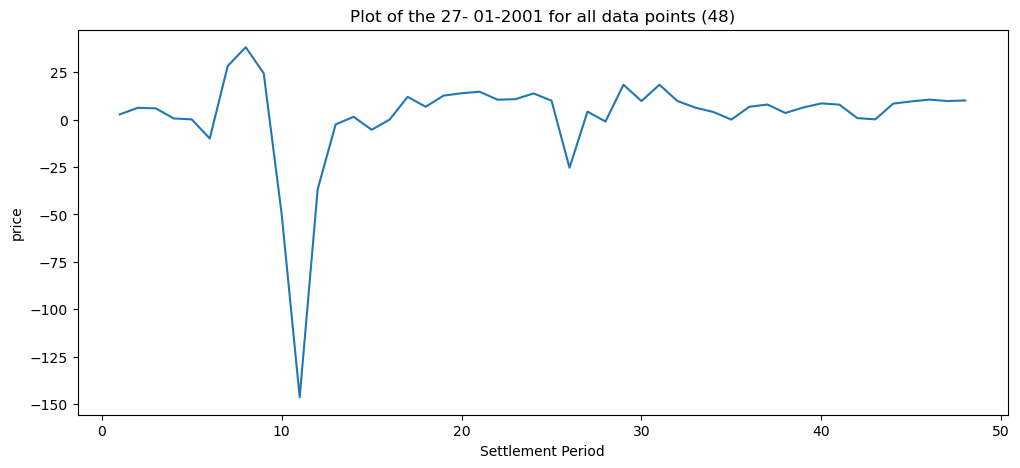

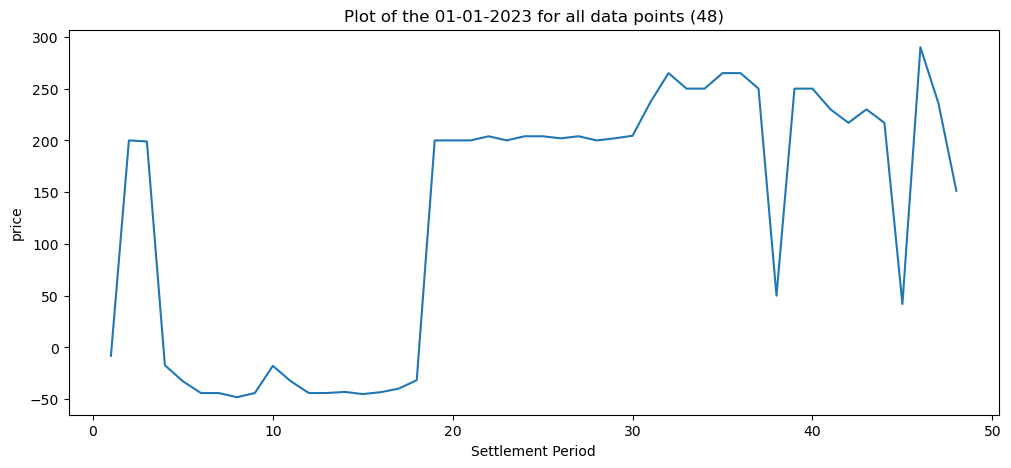

In [8]:
# plot for a day using the settlement period
plt.figure(figsize=(12, 5))
plt.title("Plot of the 27- 01-2001 for all data points (48)")
plt.xlabel('Settlement Period')
plt.ylabel('price')
x = np.arange(1, 49)
day_2001_1 = new_df.iloc[0, :-1]
day_2001_1
# for i in range(1, 49):
sns.lineplot(x= x, y = day_2001_1)

# plot for a day using the settlement period
plt.figure(figsize=(12, 5))
plt.title("Plot of the 01-01-2023 for all data points (48)")
plt.xlabel('Settlement Period')
plt.ylabel('price')
x = np.arange(1, 49)
day_data = data_2023.iloc[0, :-1]
# for i in range(1, 49):
sns.lineplot(x= x, y = day_data)


<Axes: title={'center': 'A plot of Date against Prices for a Week in 2001-01 using Avg price'}, xlabel='Date', ylabel='Prices'>

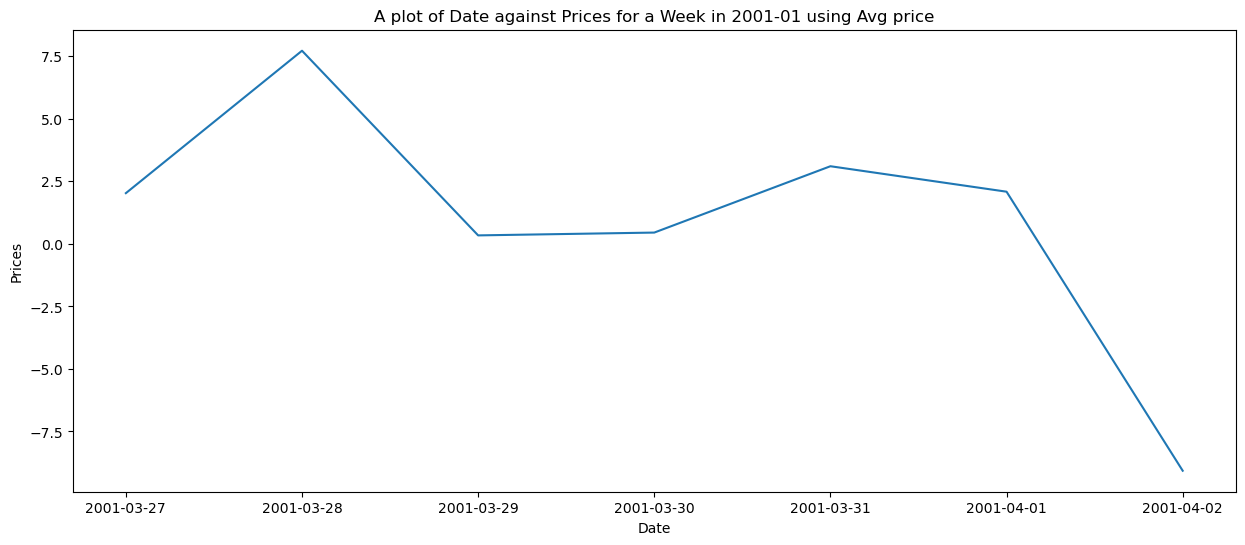

In [9]:
# plot for first seven days in Jan 2001 using avg prices
plt.figure(figsize=(15, 6))
plt.title("A plot of Date against Prices for a Week in 2001-01 using Avg price")
plt.ylabel("Prices")
# new_df["Avg"][:7]
sns.lineplot(x = new_df["Avg"].index[:7], y = new_df["Avg"][:7], )


In [10]:

# scatter  and line plot functions
def plot_year(data, year):
    plt.figure(figsize=(12, 5))
    plt.title("Plot of " + str(year)+" prices for all data points")
    plt.xlabel('year')
    plt.ylabel('price')
    for i in range(1, 49):
        sns.lineplot(x = data.index, y = data[str(i)])
def sPlot_year(data, year):
    plt.figure(figsize=(12, 5))
    plt.title("Plot of " + str(year)+" prices for all data points")
    plt.xlabel('year')
    plt.ylabel('price')
    for i in range(1, 49):
        plt.scatter(data.index, data[str(i)])
def Plot_year_mean(data, year):
    plt.figure(figsize=(12, 5))
    plt.title("Plot of " + str(year)+" prices for mean or Avg data points")
    plt.xlabel('year')
    plt.ylabel('price')
    for i in range(1, 49):
        plt.scatter(data.index, data.mean(axis=1))
        
def plot_show_category(data, year):
    # Set the Seaborn style
    sns.set(style="darkgrid")
    plt.figure(figsize=(12, 5))
    

    dfs = []

    for i in range(1, 49):


        # Create a DataFrame for the current category with 'x' and 'y' values
        df_category = pd.DataFrame({'x': data.index, 'y':  data[str(i)], 'half-hour': i})

        # Append the current category DataFrame to the list
        dfs.append(df_category)

    # Concatenate the data frames in the list into a single DataFrame
    df = pd.concat(dfs)

    # Get the number of unique categories
    num_categories = df['half-hour'].nunique()

    # Set a color palette with a different color for each category
    colors = sns.color_palette('Set1', n_colors=num_categories)

    # Plot the time series graph with hue representing the 48 categories
    sns.lineplot(data=df, x='x', y='y', hue='half-hour', palette=colors)
    plt.title("Plot of " + str(year) + "prices for all data points")
    plt.xlabel('year')
    plt.ylabel('price')
    # Display the plot
    plt.show()
        

<Axes: title={'center': 'Time series plot of Avg SSP prices from 2001 - May, 2023'}, xlabel='Date', ylabel='Price'>

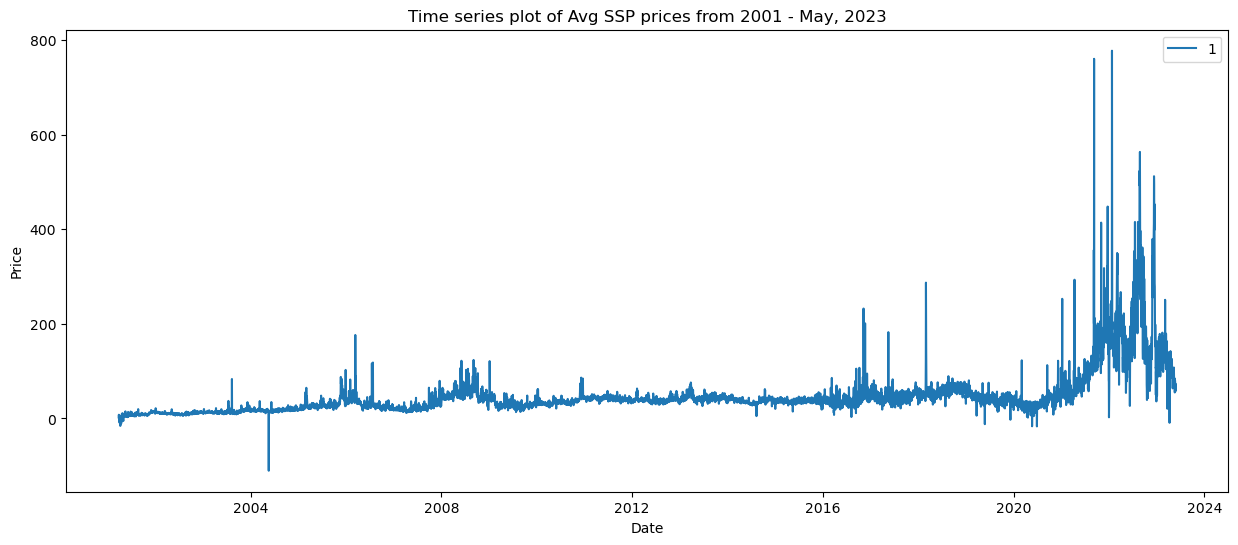

In [11]:

# Plot of year against mean prices for each day
#  Time series plot of the prices from 2001 to 2023 using the mean price
plt.figure( figsize= (15, 6))
mean_price = new_df.mean(axis = 1)
plt.title('Time series plot of Avg SSP prices from 2001 - May, 2023')
plt.ylabel('Price')
sns.lineplot(x = new_df.index, y = mean_price, hue = 1)

We can explore the year with much decrement in prices. That is 2004 there about... Lets see below

<Axes: title={'center': 'Plot of 2004 prices using avg price'}, xlabel='year', ylabel='price'>

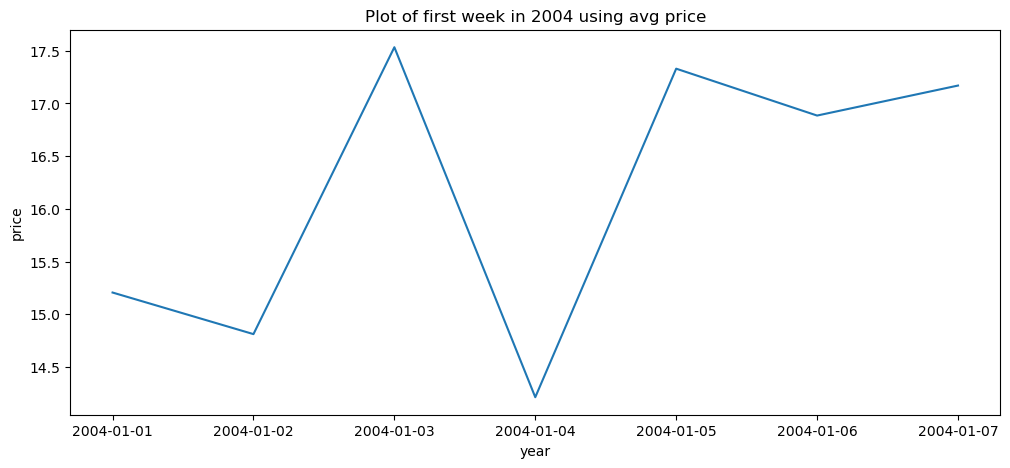

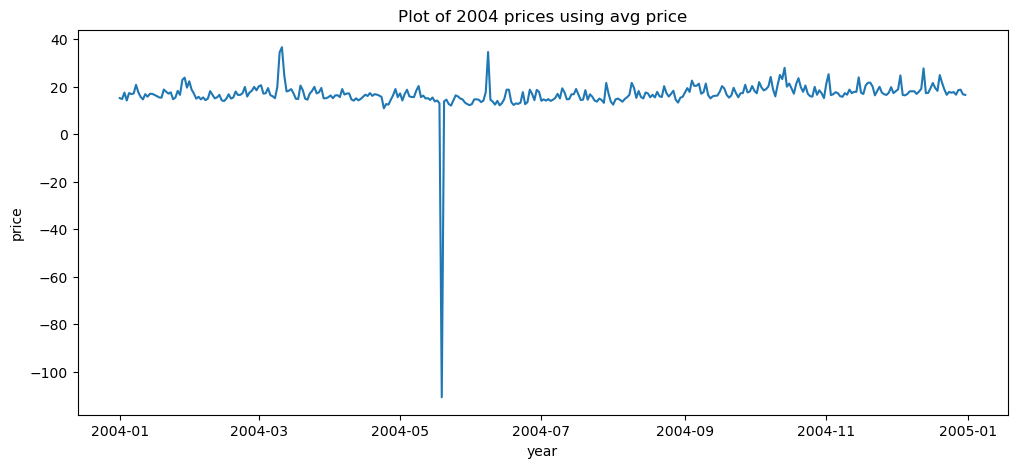

In [12]:

# data for 2004
data_2004 = new_df.iloc[280+365*2:280+365*3+1 , :]
mean_2004 = data_2004.mean(axis=1)

# plot for the first week in 2004 using mean price
plt.figure(figsize=(12, 5))
plt.title("Plot of first week in 2004 using avg price")
plt.xlabel('year')
plt.ylabel('price')
sns.lineplot(x = mean_2004.index[:7], y = mean_2004[:7])

# plot using mean
plt.figure(figsize=(12, 5))
plt.title("Plot of 2004 prices using avg price")
plt.xlabel('year')
plt.ylabel('price')
sns.lineplot(x =mean_2004.index, y = mean_2004 )


<Axes: title={'center': 'A plot for 2004 using avg price for month'}, xlabel='Months', ylabel='Prices'>

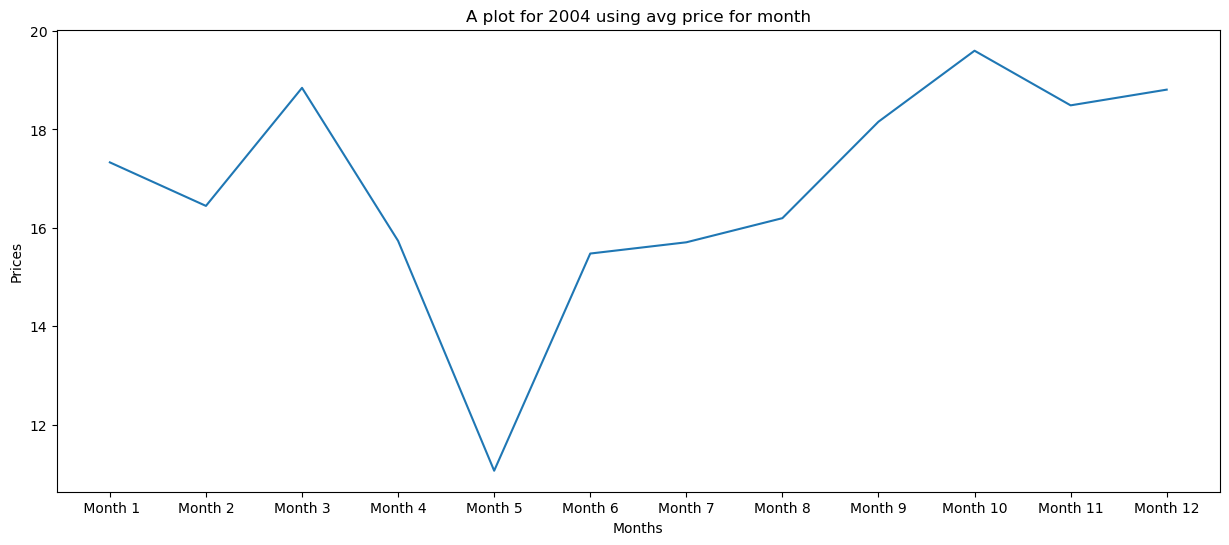

In [13]:
# Data for may 2004, that is where we see the great changes

data_2004

# # plot for first 12 months in 2004 using mean average for a month

x = [' Month 1', 'Month 2', 'Month 3', 'Month 4', 'Month 5', 'Month 6', 'Month 7', 'Month 8', 'Month 9', 'Month 10', 'Month 11', 'Month 12']

mean_1 =  data_2004['Avg'][0: 31].mean()
# mean_1

mean_2 =  data_2004['Avg'][31: 31+29].mean()
mean_3 =  data_2004['Avg'][31+29: 31+29+31].mean()

mean_4 =  data_2004['Avg'][31+29+31: 31+29+31+30].mean()

mean_5 =  data_2004['Avg'][31+29+31+30: 31+29+31+30+31].mean()

mean_6 =  data_2004['Avg'][31+29+31+30+31: 31+29+31+30+31+30].mean()
 
mean_7 =  data_2004['Avg'][31+29+31+30+31+30: 31+29+31+30+31+30+31].mean()

mean_8 =  data_2004['Avg'][31+29+31+30+31+30+31: 31+29+31+30+31+30+31+31].mean()
 
mean_9 =  data_2004['Avg'][31+29+31+30+31+30+31+31: 31+29+31+30+31+30+31+31+30].mean()
 
mean_10 =  data_2004['Avg'][31+29+31+30+31+30+31+31+30: 31+29+31+30+31+30+31+31+30+31].mean()
 
mean_11 =  data_2004['Avg'][31+29+31+30+31+30+31+31+30+31: 31+29+31+30+31+30+31+31+30+31+30].mean()
 
mean_12 =  data_2004['Avg'][31+29+31+30+31+30+31+31+30+31+30: 31+29+31+30+31+30+31+31+30+31+30+31].mean()

y = [mean_1, mean_2, mean_3, mean_4, mean_5, mean_6,mean_7, mean_8, mean_9, mean_10, mean_11, mean_12]

 
plt.figure(figsize=(15, 6))
plt.title("A plot for 2004 using avg price for month")
plt.ylabel("Prices")
plt.xlabel("Months")
sns.lineplot(x = x, y = y)

<Axes: title={'center': 'A plot for a May 2004 (First 4 weeks) using avg price'}, xlabel='Weeks', ylabel='Prices'>

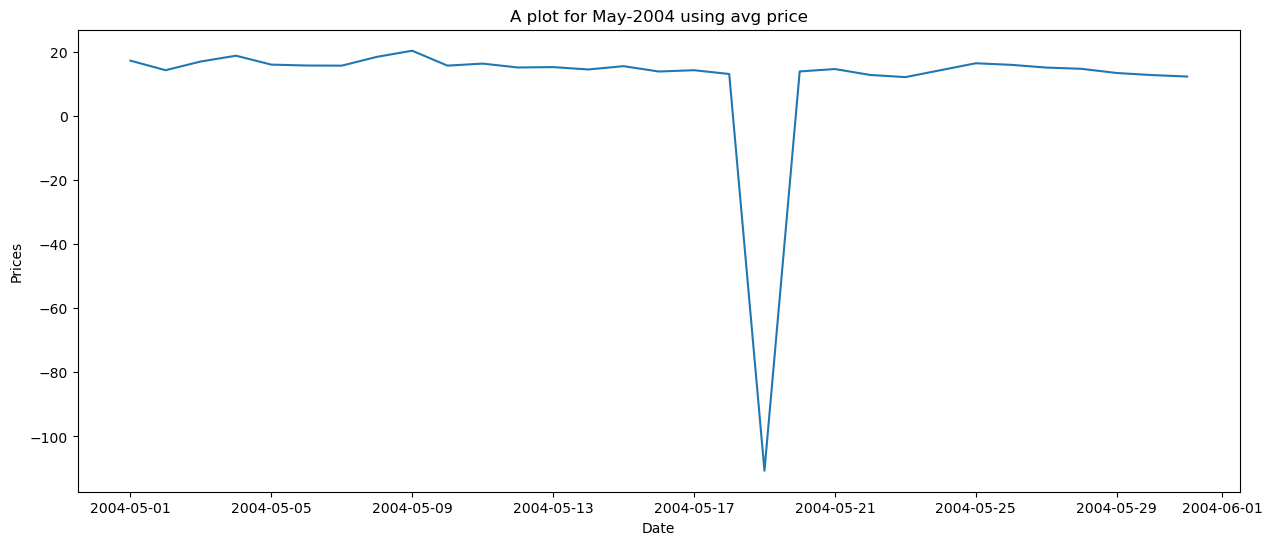

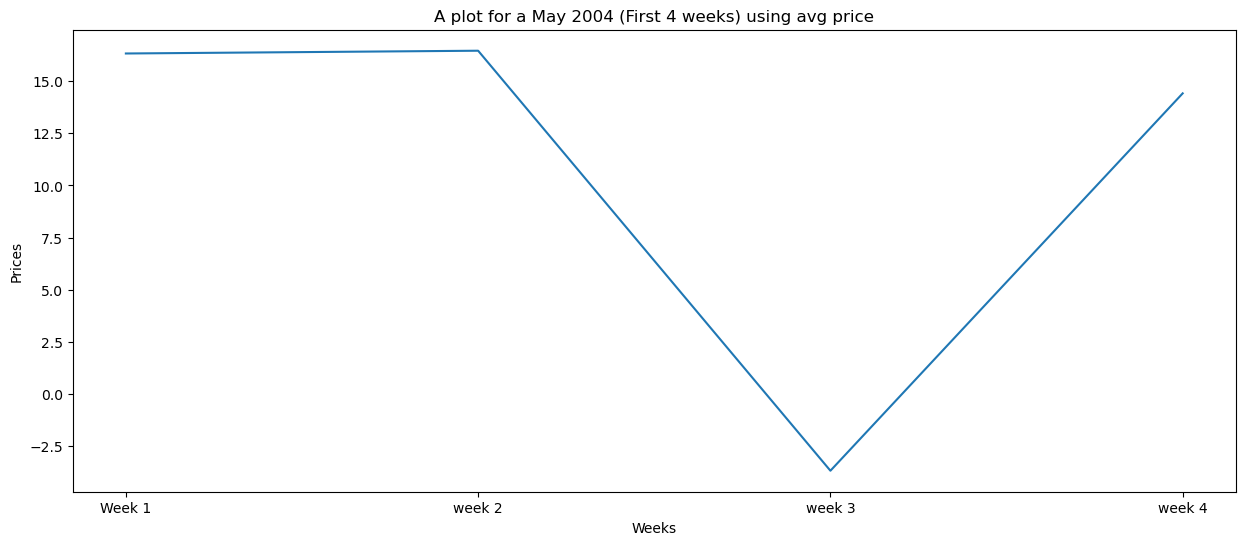

In [14]:
# Month 5 Exploration
data_2004_05 = data_2004.iloc[121: 121+31, :]
mean_2004_05 = data_2004_05.mean(axis=1)

# plot for MAY 2004 using mean values
plt.figure(figsize=(15, 6))
plt.title("A plot for May-2004 using avg price")
plt.ylabel("Prices")
sns.lineplot(x = mean_2004_05.index, y = mean_2004_05)

# plot for first 4 weeks in may 2004 using mean average for week

x = ['Week 1', 'week 2', 'week 3', 'week 4']
y = []
mean_1 =  mean_2004_05[7:14].mean()


for i in range (0, 28, 7):
    y.append(mean_2004_05[i: i+7].mean(axis= 0))
 
plt.figure(figsize=(15, 6))
plt.title("A plot for a May 2004 (First 4 weeks) using avg price")
plt.ylabel("Prices")
plt.xlabel("Weeks")
sns.lineplot(x = x, y = y)


the min price was on 19th may 2004

<Axes: title={'center': 'A plot for a May 2023 (First 4 weeks) using avg price'}, xlabel='Weeks', ylabel='Prices'>

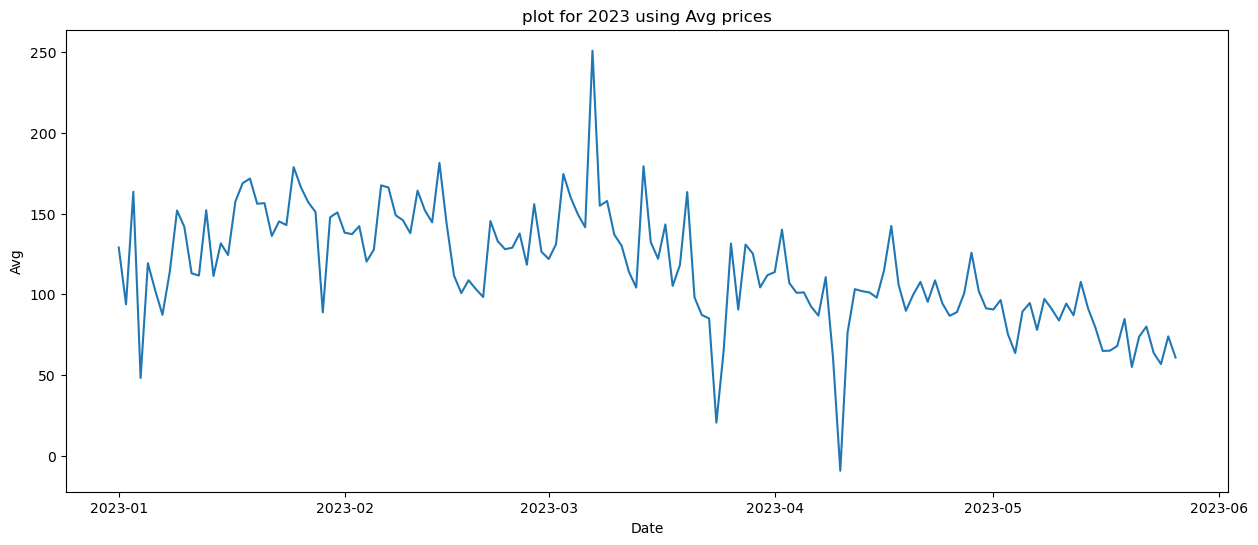

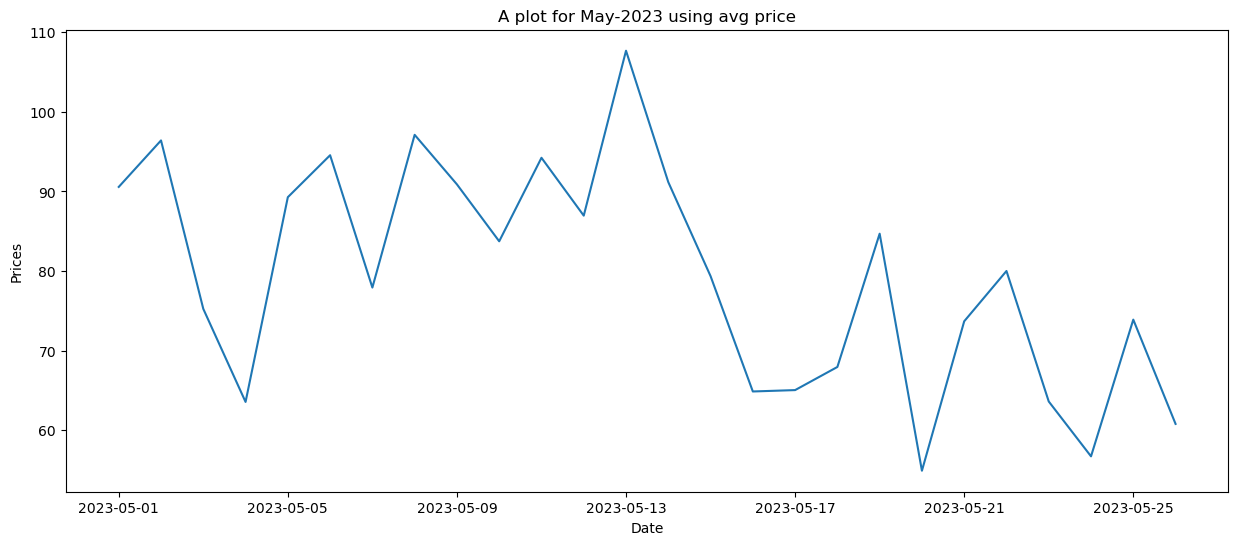

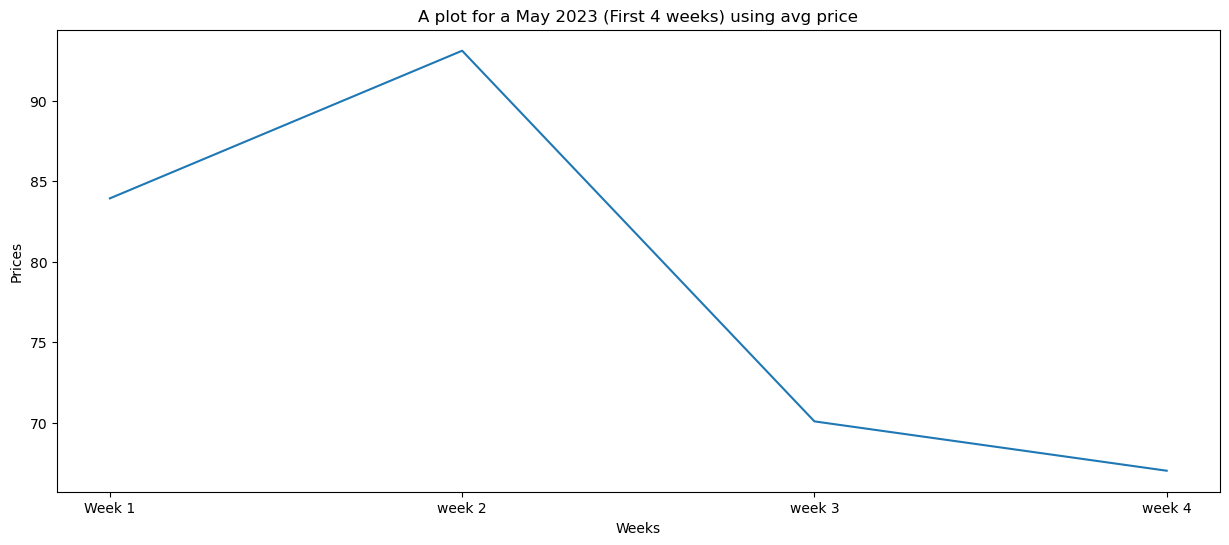

In [15]:
data_2023
data_2023_05 = new_df.iloc[8070: , :]
 
# plot for 2023 using Avg prices
plt.figure( figsize= (15, 6))
plt.title('plot for 2023 using Avg prices')
 
sns.lineplot(x = data_2023.index, y = data_2023['Avg'])
 
# # plot for MAY 2023 using mean values
plt.figure(figsize=(15, 6))
plt.title("A plot for May-2023 using avg price")
plt.ylabel("Prices")
sns.lineplot(x = data_2023_05.index, y = data_2023_05['Avg'])

# # plot for first 4 weeks in may 2023 using mean average for week

x = ['Week 1', 'week 2', 'week 3', 'week 4']
y = []

for i in range (0, 28, 7):
    y.append(data_2023_05['Avg'][i: i+7].mean())
 
plt.figure(figsize=(15, 6))
plt.title("A plot for a May 2023 (First 4 weeks) using avg price")
plt.ylabel("Prices")
plt.xlabel("Weeks")
sns.lineplot(x = x, y = y)


Update on table formating and new plots

1. Reading and Getting daily data 

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
reload_data = pd.read_csv('price_ssp_formatted.csv')
reload_data = reload_data.set_index('Date')
reload_data.index = pd.to_datetime(reload_data.index, dayfirst = True)
data_2002_2019 = reload_data[13440:30960+17520* 17 + 192]

all_mondays_2002 = reload_data[reload_data["Day"]== "Monday"][1920: 4422]
all_saturdays_2002 = reload_data[reload_data["Day"]== "Saturday"][1920: 4422]

all_mondays_2003 = reload_data[reload_data["Day"]== "Monday"][4422: 4422+2503]

all_mondays_2002_2019 = data_2002_2019[data_2002_2019["Day"]== "Monday"]
all_saturdays_2002_2019 = data_2002_2019[data_2002_2019["Day"]== "Saturday"]
all_sunday_2002_2019 = data_2002_2019[data_2002_2019["Day"]== "Sunday"]
all_tuesdays_2002_2019 = data_2002_2019[data_2002_2019["Day"]== "Tuesday"]
all_wednessdays_2002_2019 = data_2002_2019[data_2002_2019["Day"]== "Wednesday"]
all_thursdays_2002_2019 = data_2002_2019[data_2002_2019["Day"]== "Thursday"]
all_fridays_2002_2019 = data_2002_2019[data_2002_2019["Day"]== "Friday"]


-Daily plot

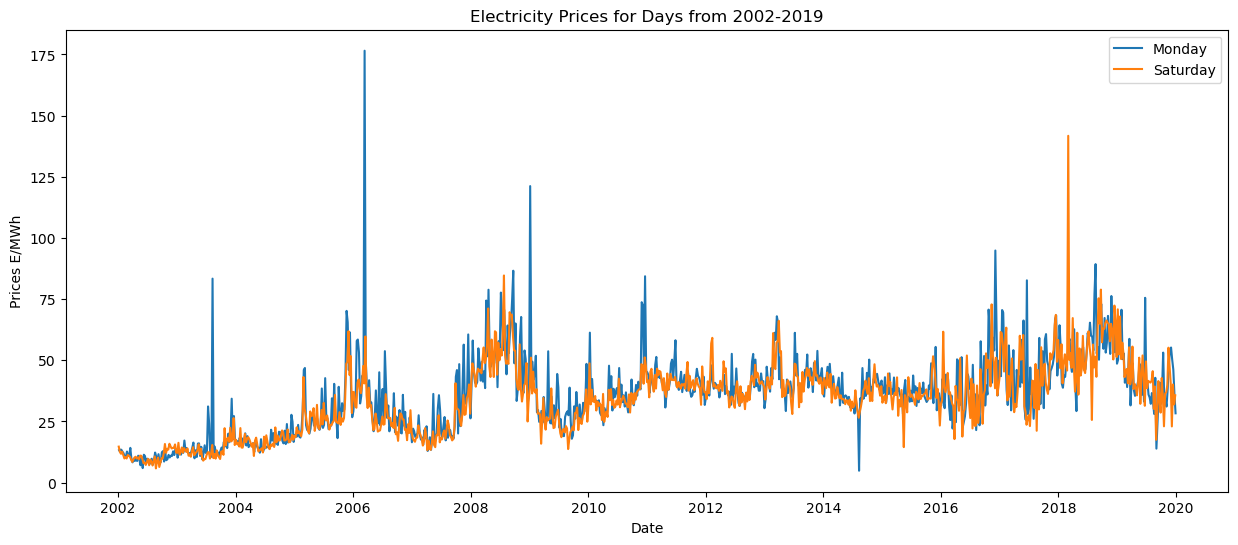

In [17]:

plt.figure( figsize= (15, 6))
plt.xlabel("Date")
plt.ylabel("Prices E/MWh")
plt.title("Electricity Prices for Days from 2002-2019")
plt.plot(all_mondays_2002_2019.index, all_mondays_2002_2019["Avg"], label = "Monday")
plt.plot(all_saturdays_2002_2019.index, all_saturdays_2002_2019["Avg"], label = "Saturday")
plt.legend()
plt.show()


Checking the spread of data and outliers using Box Plot

<Axes: title={'center': 'Box plot for Friday Prices (2002-2019)'}, xlabel='Friday', ylabel='Price'>

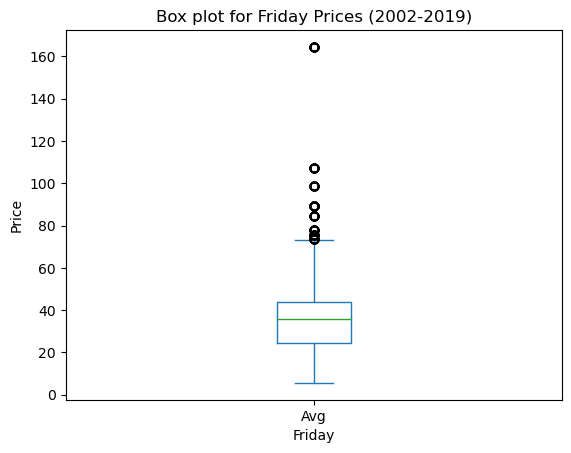

In [18]:
plt.title("Box plot for Friday Prices (2002-2019)")
plt.xlabel("Friday")
plt.ylabel("Price")
all_fridays_2002_2019.Avg.plot(kind='box',)

<Axes: title={'center': 'Box plot for days Electricity Prices from 2002-2019'}, xlabel='Avg', ylabel='Day'>

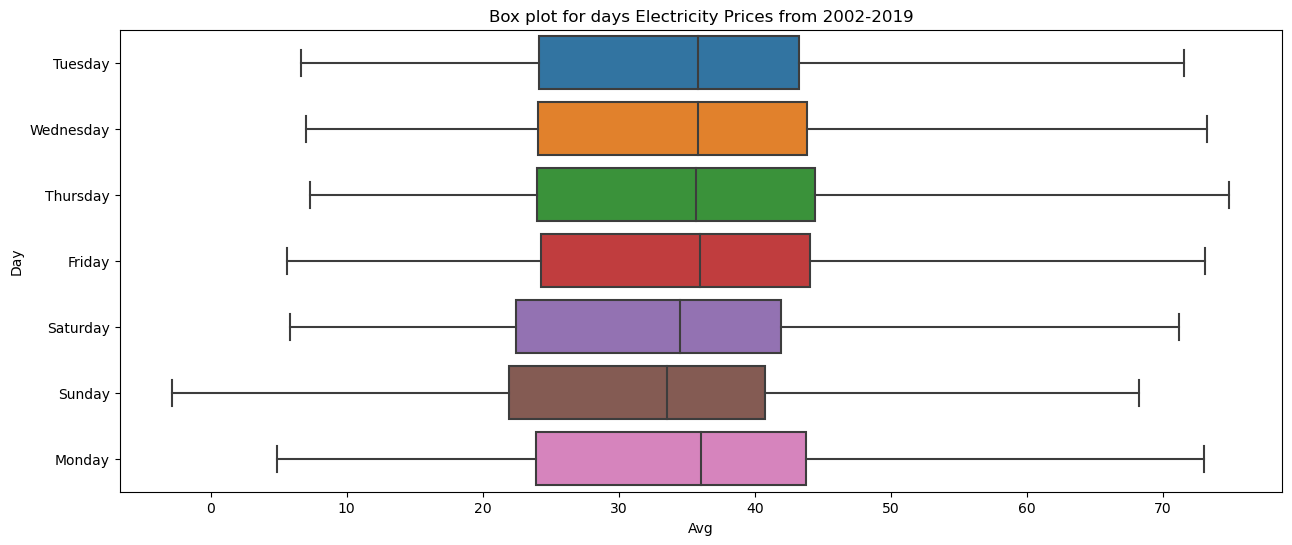

In [19]:
plt.figure( figsize= (15, 6))
plt.xlabel("Avg Prices E/MWh")
plt.ylabel("Days")
plt.title("Box plot for days Electricity Prices from 2002-2019")
sns.boxplot(x =  data_2002_2019.Avg, y = data_2002_2019.Day, showfliers = False)

Month data

In [20]:
# reload_data
all_January_from_2002_2019 = data_2002_2019[data_2002_2019["month"] == "January"]
all_March_from_2002_2019 = data_2002_2019[data_2002_2019["month"] == "March"]
all_May_from_2002_2019 = data_2002_2019[data_2002_2019["month"] == "May"]
all_July_from_2002_2019 = data_2002_2019[data_2002_2019["month"] == "July"]
all_September_from_2002_2019 = data_2002_2019[data_2002_2019["month"] == "September"]


Month Plot

In [21]:
def plotMonthForYears(data, month):
    plt.figure( figsize= (15, 6))
    plt.xlabel("Date")
    plt.ylabel("Prices")
    plt.title("Prices for all "+ str(month) + " from 2002- 2019")
    sns.lineplot(x = data.index, y = data["Avg"])

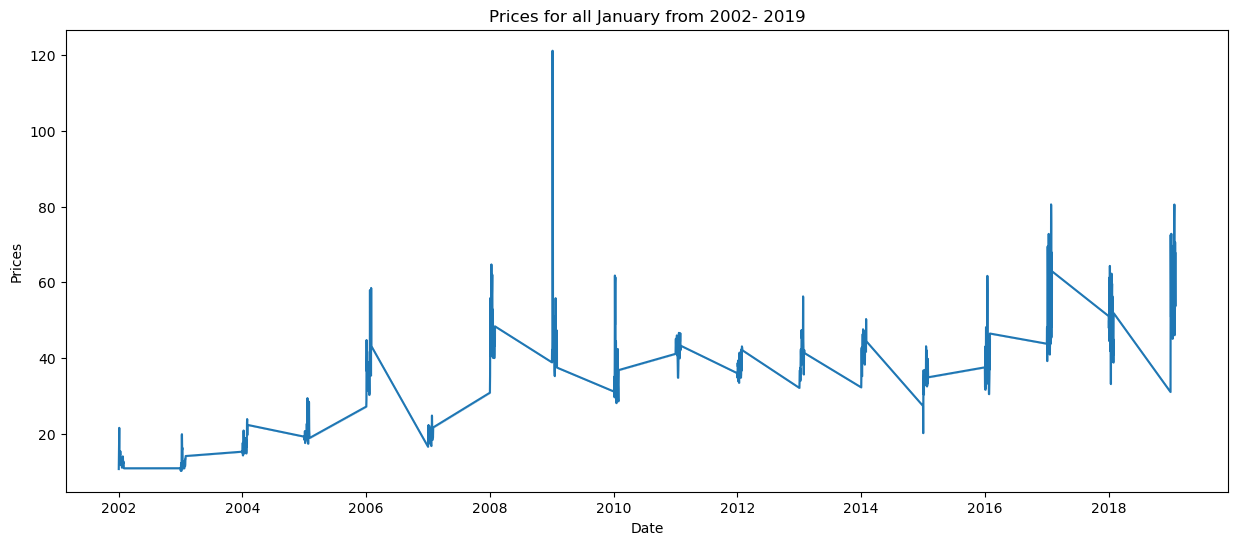

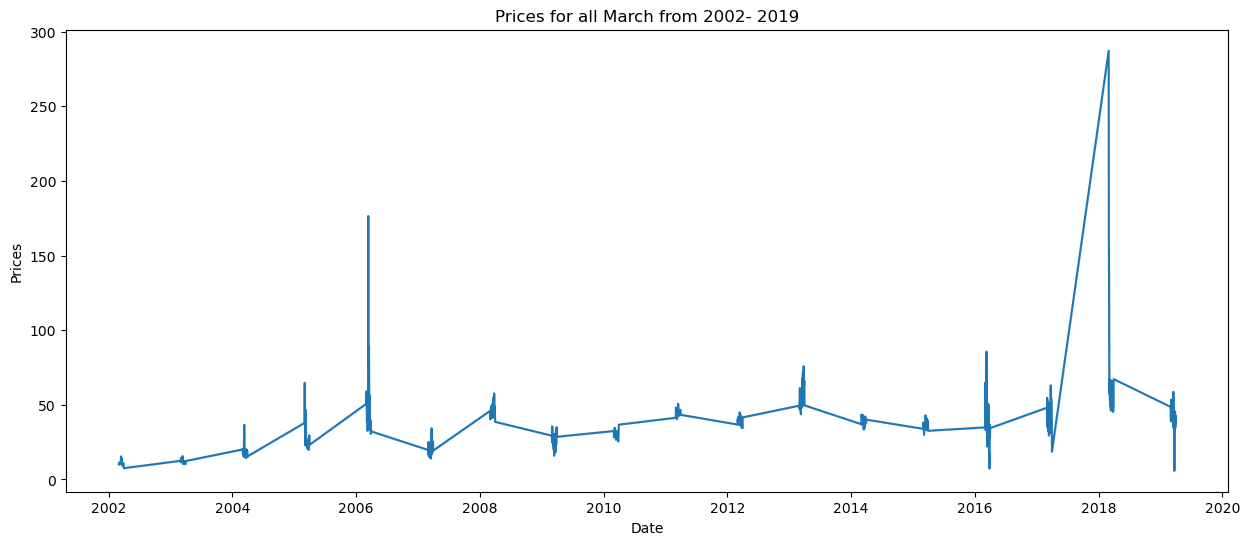

In [22]:
plotMonthForYears(all_January_from_2002_2019, "January")
# you can now use this function to plot for the other months after fetching the data for that month
# for example aplot for march will look like: check below. Note that the march data has been fetched at the top 
plotMonthForYears(all_March_from_2002_2019, "March")


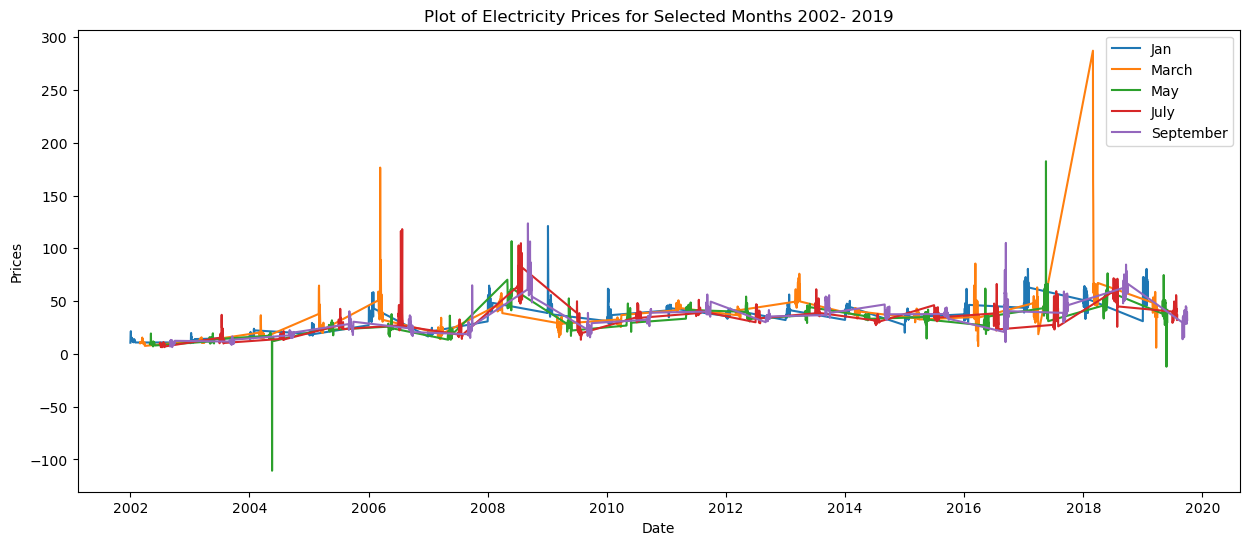

In [23]:
plt.figure( figsize= (15, 6))
plt.xlabel("Date")
plt.ylabel("Prices")
plt.title("Plot of Electricity Prices for Selected Months 2002- 2019")
plt.plot(all_January_from_2002_2019.index, all_January_from_2002_2019["Avg"], label = "Jan")
plt.plot(all_March_from_2002_2019.index, all_March_from_2002_2019["Avg"], label = "March")
plt.plot(all_May_from_2002_2019.index, all_May_from_2002_2019["Avg"], label = "May")
plt.plot(all_July_from_2002_2019.index, all_July_from_2002_2019["Avg"], label = "July")
plt.plot(all_September_from_2002_2019.index, all_September_from_2002_2019["Avg"], label = "September")
plt.legend()
plt.show()


Seasonal plot

In [24]:
all_Winter = reload_data[reload_data["season"] == "Winter"]
# all_Winter
def plot_season(x, y, season):
    plt.figure( figsize= (15, 6))
    plt.xlabel("Date")
    plt.ylabel("Prices")
    plt.title("Prices for " + season + " Season")
    sns.lineplot(x = x, y = y)
all_Summer = reload_data[reload_data["season"] == "Summer"]
all_aut = reload_data[reload_data["season"] == "Autum"]
all_Spr = reload_data[reload_data["season"] == "Spring"]


Statistical Analysis

In [25]:
all_Summer_year = all_Summer[all_Summer.index.year == 2018]
all_Summer_year.describe()

,Unnamed: 0,Avg,Settlement
count,4416.000000,4416.000000,4416.000000
mean,6320.500000,55.781010,24.500000
std,26.559551,8.641791,13.854968
min,6275.000000,25.613063,1.000000
25%,6297.750000,50.592240,12.750000
50%,6320.500000,55.246344,24.500000
75%,6343.250000,60.486677,36.250000
max,6366.000000,89.296833,48.000000


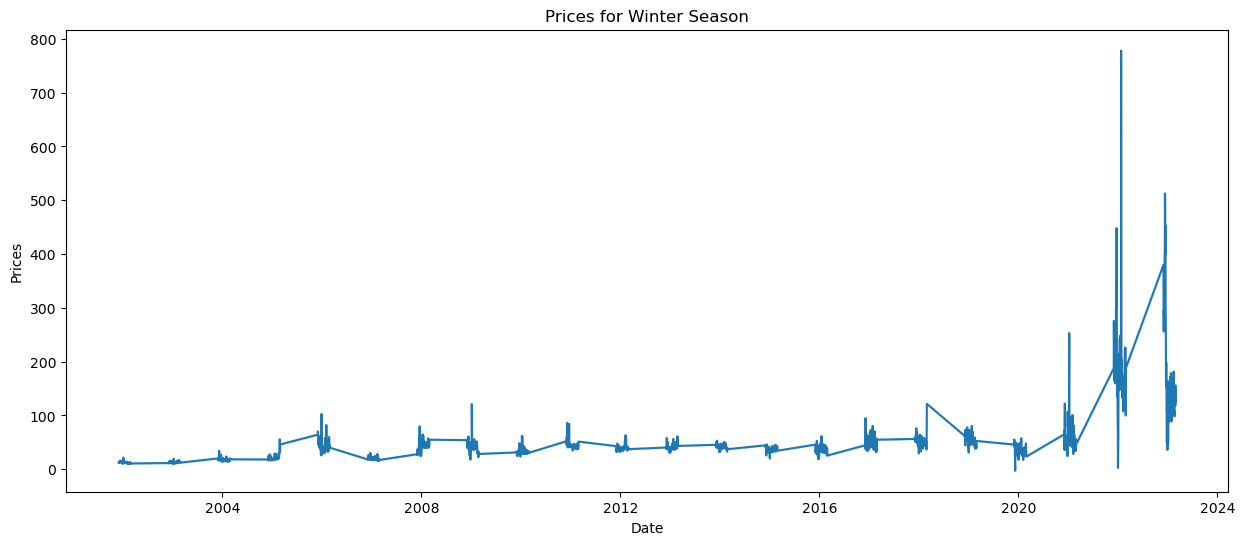

In [26]:
plot_season(all_Winter.index, all_Winter.Avg, "Winter")

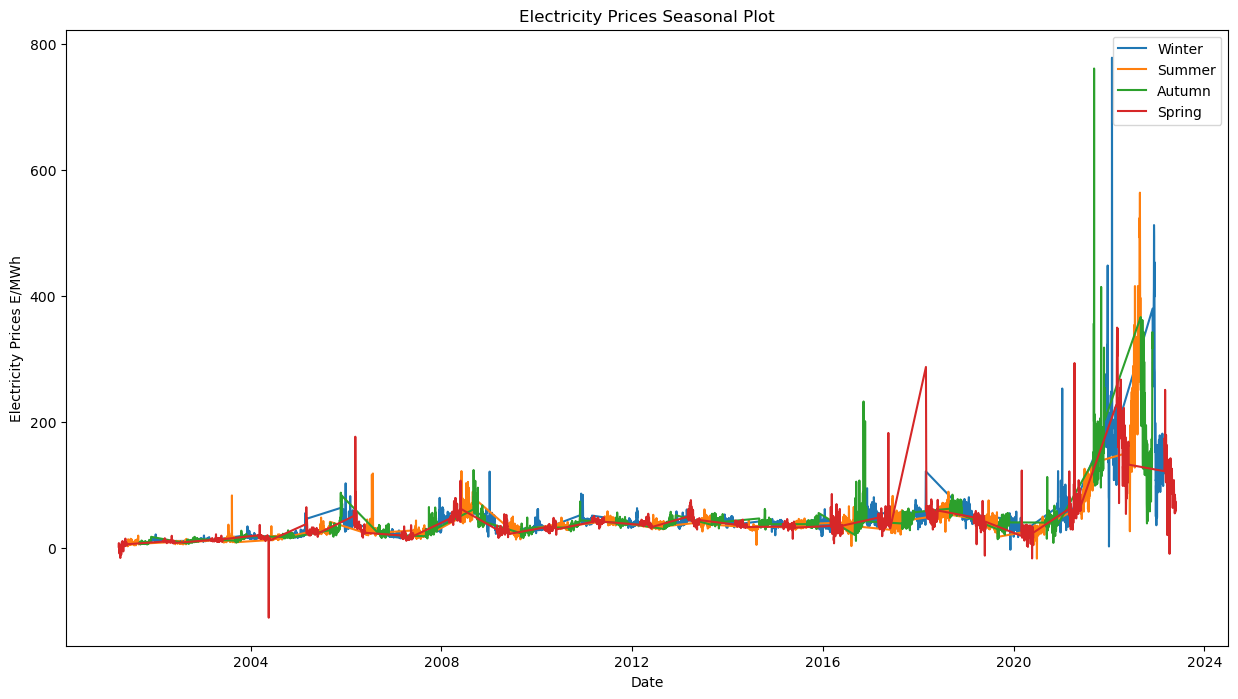

In [27]:
plt.figure(figsize=(15, 8))
plt.xlabel("Date")
plt.ylabel("Electricity Prices E/MWh")
plt.plot(all_Winter.index, all_Winter.Avg, label="Winter")
plt.plot(all_Summer.index, all_Summer.Avg, label="Summer")
plt.plot(all_aut.index, all_aut.Avg, label="Autumn")
plt.plot(all_Spr.index, all_Spr.Avg, label="Spring")
plt.title("Electricity Prices Seasonal Plot")
plt.legend()
plt.show()


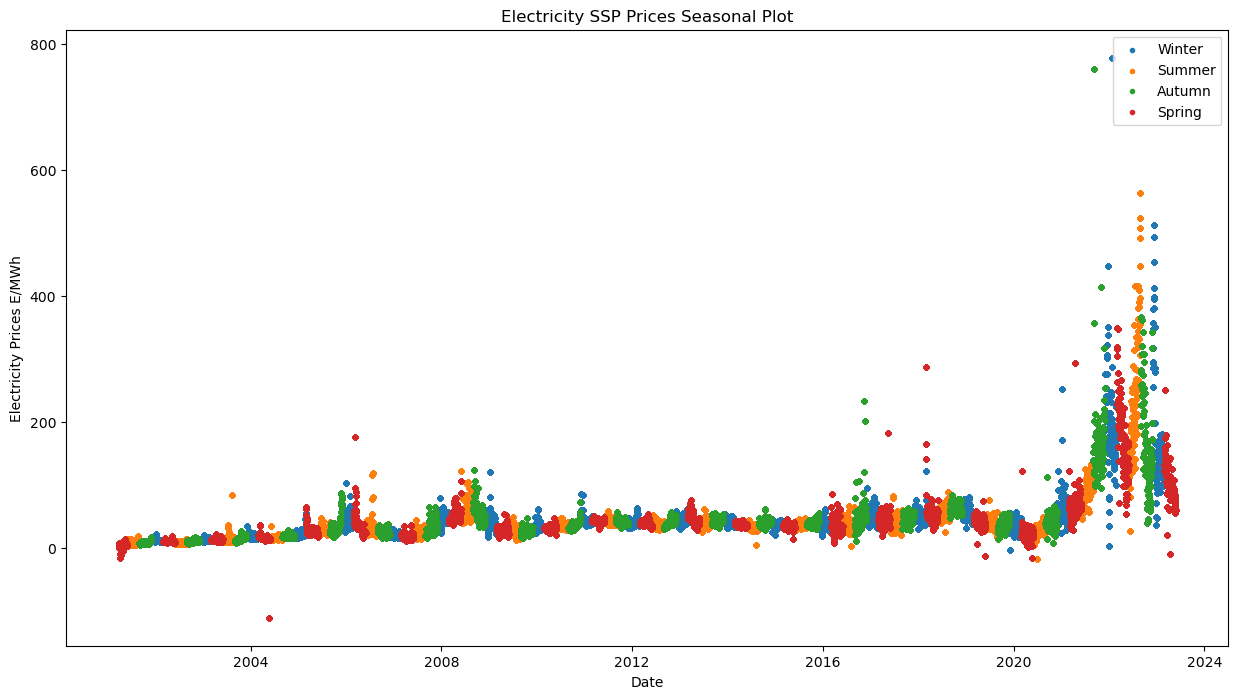

In [40]:
plt.figure(figsize=(15, 8))
plt.xlabel("Date")
plt.ylabel("Electricity Prices E/MWh")
plt.scatter(all_Winter.index, all_Winter.Avg, label="Winter", marker = '.')
plt.scatter(all_Summer.index, all_Summer.Avg, label="Summer", marker = '.')
plt.scatter(all_aut.index, all_aut.Avg, label="Autumn", marker = '.')
plt.scatter(all_Spr.index, all_Spr.Avg, label="Spring", marker = '.')
plt.title("Electricity SSP Prices Seasonal Plot")
plt.legend()
plt.show()


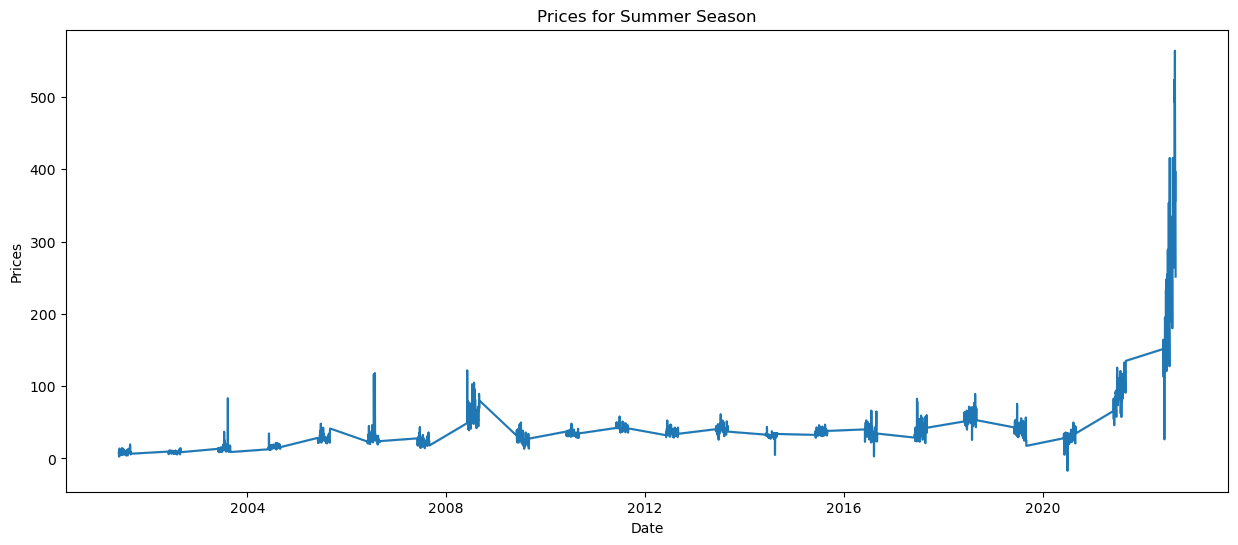

In [28]:
all_Summer = reload_data[reload_data["season"] == "Summer"]
plot_season(all_Summer.index, all_Summer.Avg, "Summer")


In [29]:

years = [2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
seasns = ["Winter", "Spring", "Summer", "Autum"]
winter_avg = []
spring_avg = []
summer_avg = []
autum_avg = []
for i in years:
    data = data_2002_2019[data_2002_2019.index.year == i]
    winter_avg.append(data[data['season'] == "Winter"]["Avg"].mean())
for i in years:
    data = data_2002_2019[data_2002_2019.index.year == i]
    spring_avg.append(data[data['season'] == "Spring"]["Avg"].mean())
for i in years:
    data = data_2002_2019[data_2002_2019.index.year == i]
    summer_avg.append(data[data['season'] == "Summer"]["Avg"].mean())
for i in years:
    data = data_2002_2019[data_2002_2019.index.year == i]
    autum_avg.append(data[data['season'] == "Autum"]["Avg"].mean())


In [30]:
 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime

years = [2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

# Convert years to datetime format
dates = [datetime.datetime(year, 1, 1) for year in years]
def plot_season_using_avg_price_for_year(data, season):
    plt.figure(figsize=(12, 6))
    plt.xlabel("Date")
    plt.ylabel("Prices")
    plt.title("Prices for " + str(season) + " Season from 2002 - 2019 using avg price for each year")

    # Set the x-axis ticks and labels to display dates
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.gca().xaxis.set_major_locator(mdates.YearLocator())

    # Plot the data
    plt.plot(dates, data)

    plt.show()


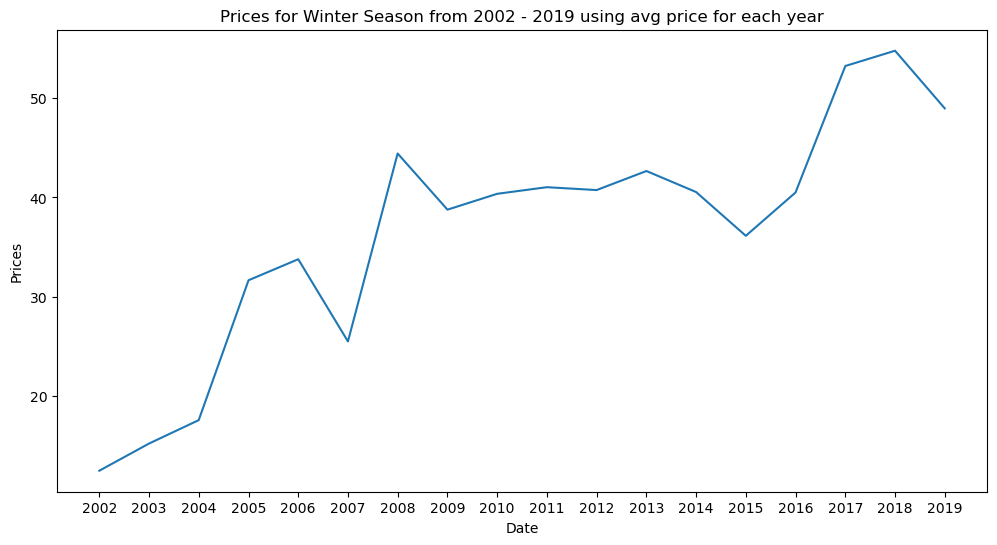

In [31]:
plot_season_using_avg_price_for_year(winter_avg, "Winter")

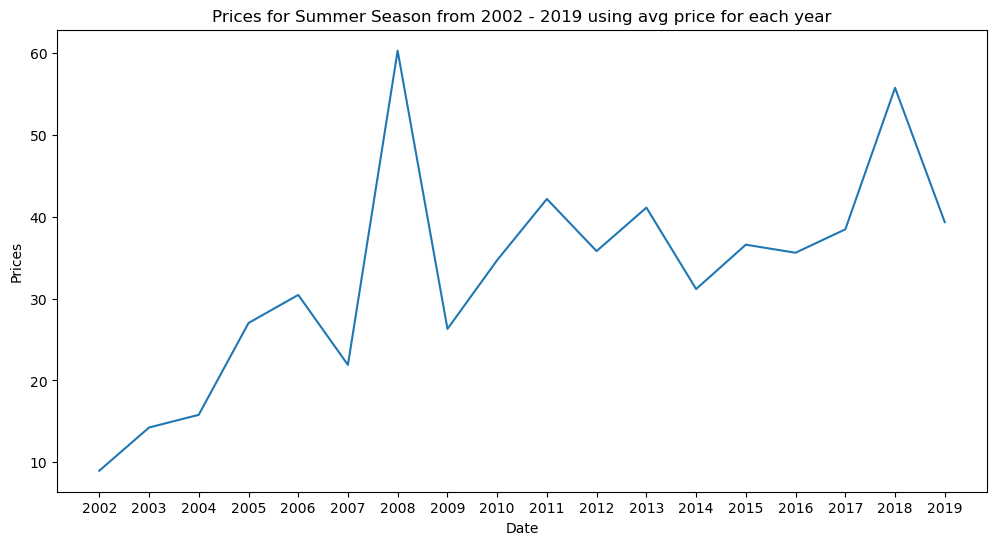

In [32]:
plot_season_using_avg_price_for_year(summer_avg, "Summer")

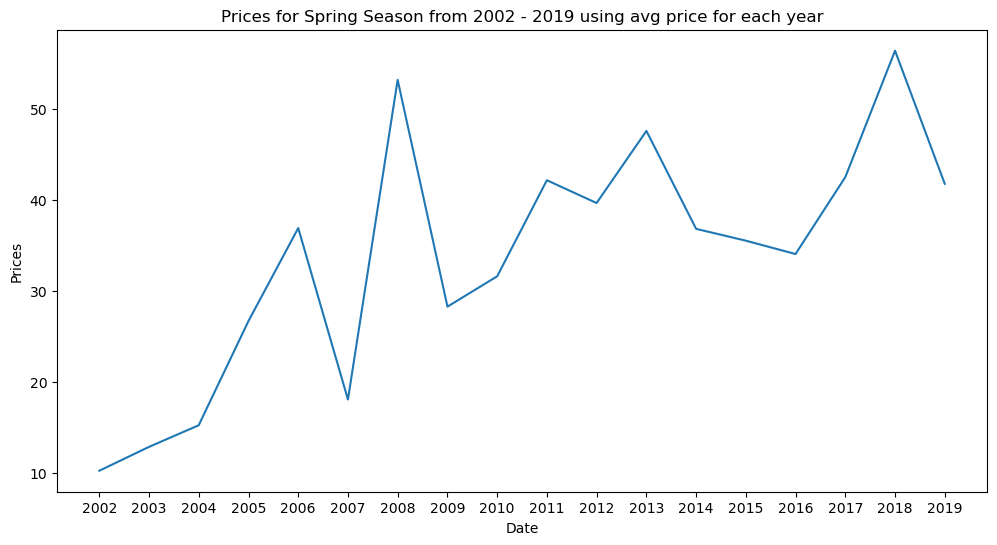

In [33]:
plot_season_using_avg_price_for_year(spring_avg, "Spring")


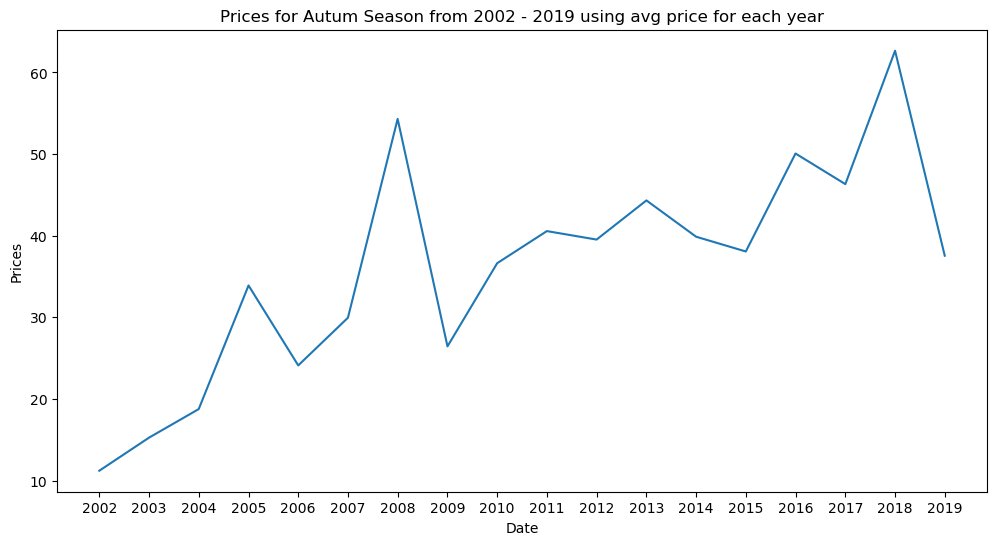

In [34]:
plot_season_using_avg_price_for_year(autum_avg, "Autum")


<Axes: title={'center': 'Box plot for seasons from 2002-2019'}, xlabel='Avg', ylabel='season'>

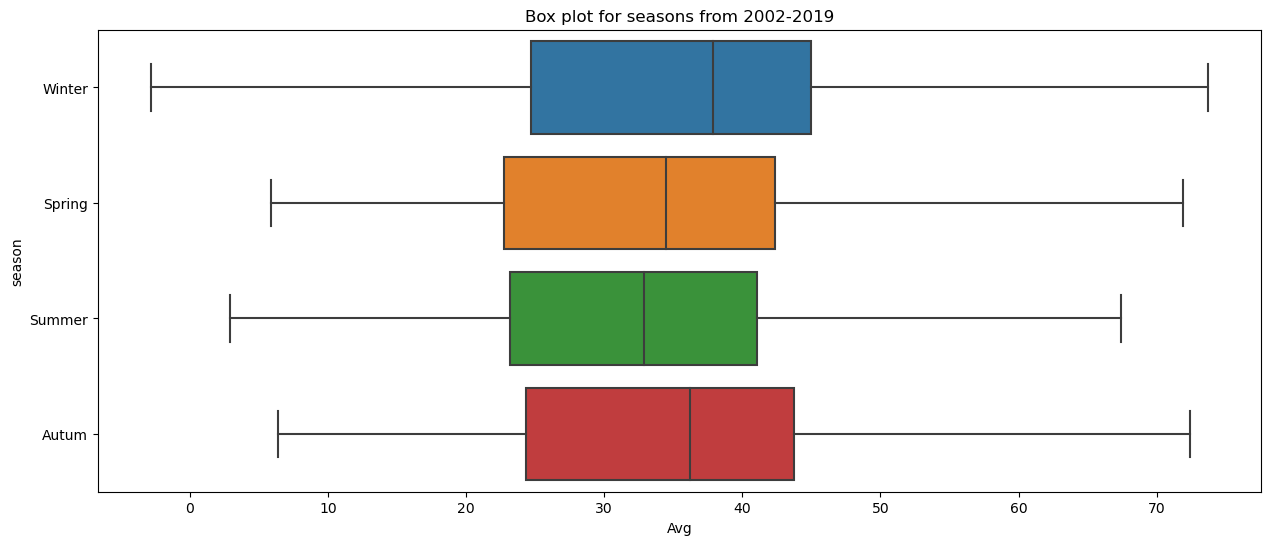

In [41]:
plt.figure( figsize= (15, 6))
plt.xlabel("Prices")
plt.ylabel("Season")
plt.title("Box plot for seasons from 2002-2019")
sns.boxplot(x =  data_2002_2019.Avg, y = data_2002_2019.season, showfliers = False)

NameError: name 'all_Spring' is not defined

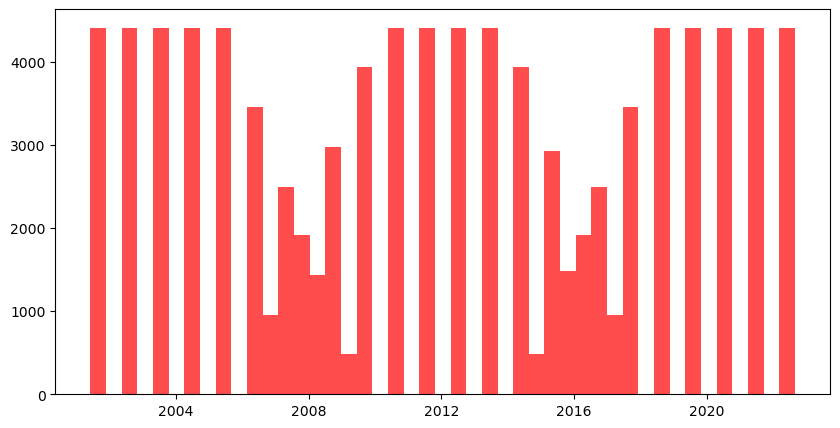

In [36]:
# # Plot histograms for weekdays and weekends in the same graph
plt.figure(figsize=(10, 5))
plt.hist(all_Summer.index, bins='auto', color='red', alpha=0.7, label='Summer')
plt.hist(all_Spring.index, bins='auto', color='blue', alpha=0.7, label='Spring')
plt.hist(all_Autum.index, bins='auto', color='green', alpha=0.7, label='Autum')
plt.hist(all_Winter.index, bins='auto', color='orange', alpha=0.7, label='Winter')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Histogram of season data')
plt.legend()
plt.show()

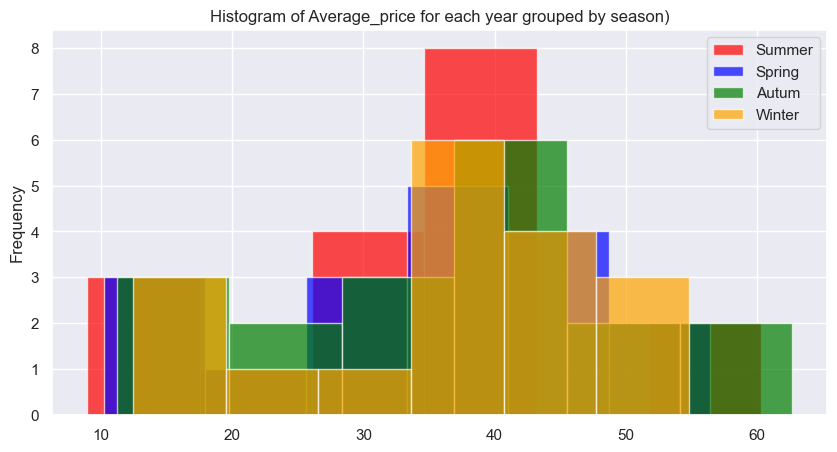

In [ ]:
# # Plot histograms for weekdays and weekends in the same graph
plt.figure(figsize=(10, 5))
plt.hist(summer_avg, bins='auto', color='red', alpha=0.7, label='Summer')
plt.hist(spring_avg, bins='auto', color='blue', alpha=0.7, label='Spring')
plt.hist(autum_avg, bins='auto', color='green', alpha=0.7, label='Autum')
plt.hist(winter_avg, bins='auto', color='orange', alpha=0.7, label='Winter')
# plt.xlabel('SSP_Season Avg for each year')
plt.ylabel('Frequency')
plt.title('Histogram of Average_price for each year grouped by season)')
plt.legend()
plt.show()